In [1]:
from collections import Counter
from IPython.display import display
from datasets import load_dataset
from PIL import Image
import numpy as np
import cv2

In [3]:
dataset = load_dataset(path="aamijar/muharaf-public")

dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 22092
    })
    validation: Dataset({
        features: ['image', 'text'],
        num_rows: 1069
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 1334
    })
})

In [4]:
def display_samples(dataset, n=5, mode="rgb"):
  for split_name, split_data in dataset.items():

    print(f'\nShowing {n} images from split: {split_name}')

    for i in range(n):
      image = split_data[i]["image"]

      match mode:
        case "gray":
          image = image.convert("L")

        case "heat":
          gray = np.array(image.convert("L"))
          norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
          heat = cv2.applyColorMap(norm.astype(np.uint8), cv2.COLORMAP_JET)
          image = Image.fromarray(cv2.cvtColor(heat, cv2.COLOR_BGR2RGB))

        case _:
          image = image.convert("RGB")

      display(image)
      print()


Showing 2 images from split: train


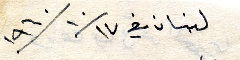

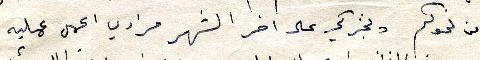



Showing 2 images from split: validation


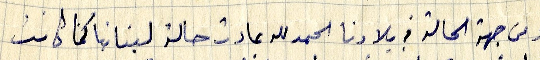

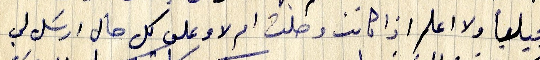



Showing 2 images from split: test


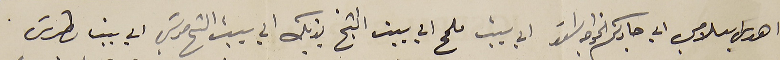

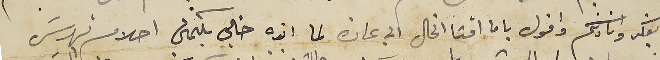



Showing 2 images from split: train


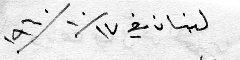

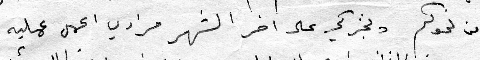



Showing 2 images from split: validation


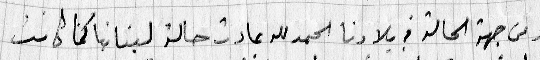

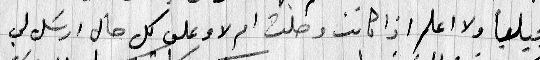



Showing 2 images from split: test


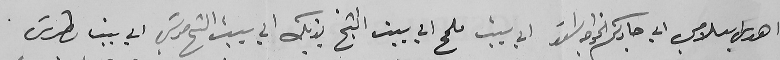

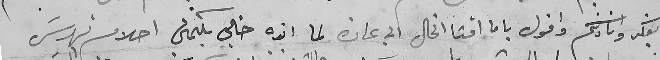



Showing 2 images from split: train


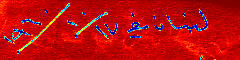

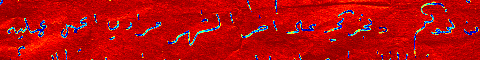



Showing 2 images from split: validation


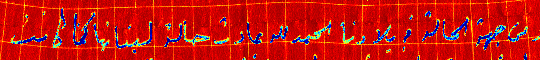

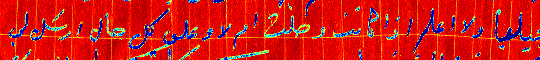



Showing 2 images from split: test


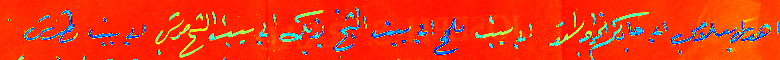

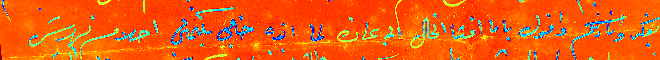

In [6]:
display_samples(dataset=dataset, n=2, mode="rgb")
display_samples(dataset=dataset, n=2, mode="gray")
display_samples(dataset=dataset, n=2, mode="heat")

In [7]:
def count_size_mode(dataset):
  for split_name, split_data in dataset.items():
      sizes = Counter()
      modes = Counter()

      for item in split_data:
          image = item["image"]

          sizes[(image.width, image.height)] += 1
          modes[image.mode]                  += 1

      print(f'\nSplit: {split_name}')

      for size, count in sizes.most_common(): print(f'{count} images of size {size}')

      for mode, count in modes.items(): print(f'{count} images with mode {mode}')

In [8]:
count_size_mode(dataset)


Split: train
2405 images of size (600, 60)
2069 images of size (540, 60)
1992 images of size (660, 60)
1832 images of size (480, 60)
1606 images of size (720, 60)
1400 images of size (780, 60)
1268 images of size (840, 60)
1267 images of size (420, 60)
1147 images of size (900, 60)
1038 images of size (180, 60)
1014 images of size (240, 60)
894 images of size (360, 60)
873 images of size (300, 60)
862 images of size (120, 60)
840 images of size (960, 60)
586 images of size (60, 60)
522 images of size (1020, 60)
262 images of size (1080, 60)
119 images of size (1140, 60)
43 images of size (1200, 60)
22 images of size (1260, 60)
18 images of size (1320, 60)
6 images of size (1440, 60)
4 images of size (1380, 60)
2 images of size (1500, 60)
1 images of size (1620, 60)
22092 images with mode RGB

Split: validation
105 images of size (540, 60)
105 images of size (660, 60)
103 images of size (600, 60)
94 images of size (720, 60)
81 images of size (480, 60)
67 images of size (780, 60)
66 ima

In [10]:
dataframe = dataset["train"].to_pandas()

dataframe.sample(20)["text"]

,text
239,ولما كانت هيئة اختيارية قرية جاج تمتنع من تسلي...
14258,والخوري يوسَف ابي صعب تحوم. ونعوم نخول البيطار...
15083,الليل حتى وصلنا مكان يسحق جراى الساعة ٧ من الن...
11859,نسخة رسمية طبق الاصل
10583,واقدم هديه ديلور لنعمه الله.
8579,وعشرون سَنة منذ تولى سَلفكم واعطانا بذالك حجج ...
17844,ابوسليم صاحبك فهمان بيك بدو يعمل ابوعلي بفت
17201,اسعد : درباس شو عم تحكي .
8968,حتى نختمها فامتنعنا عن ختمها. فقال اما اختموها...
6523,يا بنية وقفي في الرواق وامنعي اياً كان يريد ال...


In [11]:
print(dataframe["text"].isna().sum())

1


In [12]:
dataframe.dropna(inplace=True)

In [13]:
print(dataframe.duplicated(subset="text").sum())

1251


In [15]:
dataframe["length"] = dataframe["text"].apply(lambda sentence: len(sentence.split()))

dataframe.sample(20)

,image,text,length
8038,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"ان نخدمكم؟""، فقال له نقولا قربان: ""أتريد ان تخ...",15
1286,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,هيكو. او كتاباتك لان في الأولى فلسفة,7
5943,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,سَيدي الحبر الجليل المطران عبدالله الخوري الكل...,9
1868,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,كان تهكُماً على الرجل بكاهن والطبيب والمحامي ف...,10
16703,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,منصور خيرالله كيروز,3
9816,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,مار جرجس - غوايا .,5
3221,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,في القصر بغَزْنَه (١) عاصمة افغانساتن,6
12627,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,٢,1
4399,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,سَلامنا على سَيادة الفغالي وسَائر ابا الحاشية ...,8
3139,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,وسًأكتب اليك فيما بعد باسًهاب كما اشتهي. وأرجو...,10
